# vedio 1

In [11]:
# basic fibinocci
a = 0
b = 1
for i in range(10):
    print(a, end=' ')
    a, b = b, a + b
    
# recursion Implementation
def fib(n):
    if n <= 1:
        return n
    else:
        return fib(n-1) + fib(n-2)
print(fib(10))

# Dp implementation
def fib(n, dp):
    if n <= 1:
        return n
    if dp[n] != -1:
        return dp[n]
    dp[n] = fib(n-1, dp) + fib(n-2, dp)
    return dp[n]
n = 10
dp = [-1] * (n + 1)
print(fib(n, dp))


0 1 1 2 3 5 8 13 21 34 55
55


# vedio 3. --- leetcode 70. Climbing Stairs

In [ ]:
class Solution:
    def climbStairs(self, n: int) -> int:
        dp =  [-1]*(n+1)
        dp[1] = 1
        def rec(step,dp_array):
            if step <= 1:
                return 1
            if dp_array[step] != -1:
                return dp_array[step]
            else:
                dp_array[step] = rec(step-1,dp_array)+rec(step-2,dp_array)
                return dp_array[step]
        k = rec(n,dp)
        return k

# Frog Jump

In this there is a frog which is at 0 indexed stone it need to jump to (n-1)th index stone. (zero based indexing)
condition is frog can jump i+1 or i+2th position from i.

Frog need some energy to jump from one stone to other stone that energy is absolute difference between height

### Target is to find minimum energy required to reach the final stone

### Approach

use memoization. How can i use that? if can go forward i to i+1 or i+2, That mean if send function input 
fun(n):
    left = fun(n-1) + abs(arr[n] - arr[n-1]) // energy required to go fun(n-1) + current energy consumed 
    right = float("inf")
    if right>1:
        right = fun(n-2) + abs(arr[n] - arr[n-2])
    return min(left,right)
fun(n-1)

### What if frog can jump k stones at a time? 
in above case that frog can jump only two steps `i+1, i+2`. what if it can jump upto i+k. K mentioned in question
k = 3
def fun(n):
    minEnergy = float("inf")
    if n == 0:
        return 0
    for i in range(1, k):
        if n-i >= 0:
            energy = fun(n-i) + abs(arr[n] - arr[n-i]) # energy required to go fun(n-1) + current energy consumed 
            minEnergy = min(minEnergy,energy)
    return minEnergy
fun(len(arr)-1)

In [25]:
arr = [10,20,30,10]
"""
def fun(n):
    if n == 0:
        return 0
    left = fun(n-1) + abs(arr[n] - arr[n-1]) # energy required to go fun(n-1) + current energy consumed 
    right = float("inf")
    if n > 1:
        right = fun(n-2) + abs(arr[n] - arr[n-2])
    return min(left,right)
fun(len(arr)-1)

# coverting to dp
dp = [-1]  * (len(arr)+1)
def fun(n):
    if n == 0:
        return 0
    if dp[n] != -1:
        return dp[n]
    left = fun(n-1) + abs(arr[n] - arr[n-1]) # energy required to go fun(n-1) + current energy consumed 
    right = float("inf")
    if n > 1:
        right = fun(n-2) + abs(arr[n] - arr[n-2])
    dp[n] = min(left,right)
    return dp[n]
fun(len(arr)-1)
"""
k = 2
def fun(n):
    minEnergy = float("inf")
    if n == 0:
        return 0
    for i in range(1, k):
        if n-i >= 0:
            energy = fun(n-i) + abs(arr[n] - arr[n-i]) # energy required to go fun(n-1) + current energy consumed 
            minEnergy = min(minEnergy,energy)
    return minEnergy
fun(len(arr)-1)



40

### Max Sum of non Adjacent Elements

the change made is, Come from back if there are two cases 
1. pick
2. notPick

if you pick no need to visit immediate previous
if notPick then go for previous

with that some base cases added and max of pick not pick stored


In [31]:
class Solution:
	
	def findMaxSum(self,arr):
		# code here
# 		dp = [-1]*len(arr)
	    """def rec(ind):
	        
	        if ind == 0:
	            return arr[ind]
		    elif ind < 0:
		        return 0
		    if dp[ind] != -1:
		        return dp[ind]
		    
		    pick = arr[ind] + rec(ind-2)
		    notPick = rec(ind-1)
		    dp[ind] = max(pick,notPick)
		    return dp[ind]
		    
		sum = rec(len(arr)-1)
        return sum
        
        # tabulation
        
        # handling base case 
        dp[0] = arr[0]
        # for ind < 0: lets see at calculation
        
        for i in range(1,len(arr)):
            pick = arr[i];
            if i-2 > -1:
                pick += dp[i-2]
            notPick = dp[i-1]
            dp[i] = max(pick,notPick)
        
        return dp[-1]
        
        
        
        #tabulation optimization
        a = 0
        b = arr[0]
        # for ind < 0: lets see at calculation
        
        for i in range(1,len(arr)):
            pick = arr[i];
            if i-2 > -1:
                pick += a
            notPick = b
            
            a = b
            b =  max(pick,notPick)
        
        return b        """
        # included tabulation optimization too
    

### 213. House Robber II
<pre>
You are a professional robber planning to rob houses along a street. Each house has a certain amount of money stashed. All houses at this place are arranged in a circle. That means the first house is the neighbor of the last one. Meanwhile, adjacent houses have a security system connected, and it will automatically contact the police if two adjacent houses were broken into on the same night.

Given an integer array nums representing the amount of money of each house, return the maximum amount of money you can rob tonight without alerting the police.

Same as above but first and last are adjacent
Approch is the that at same time we don't have first and last.
so we prepare two arrays one doesn't contains first and other last doesn't contain

In [ ]:
class Solution:
    def bob(self, nums: List[int]) -> int:
        dp  = [-1]*len(nums)
        def rec(ind):
            if ind == 0:                
                return nums[0]
            elif ind < 0:
                return 0

            if dp[ind] != -1:
                return dp[ind]        

            else:
                pick = nums[ind] + rec(ind-2)
                notPick = rec(ind-1)
            dp[ind] = max(pick,notPick)
            return dp[ind]

        output = rec(len(nums)-1)
        return output

    def rob(self, nums: List[int]) -> int:
        if len(nums)== 1:
            return nums[0]
        temp1 = nums[:-1] # last removed
        temp2 = nums[1:] # front Removed


        output1 = self.bob(temp1)
        output2 = self.bob(temp2)        
        return max(output1,output2)


### this is ninja's training problem

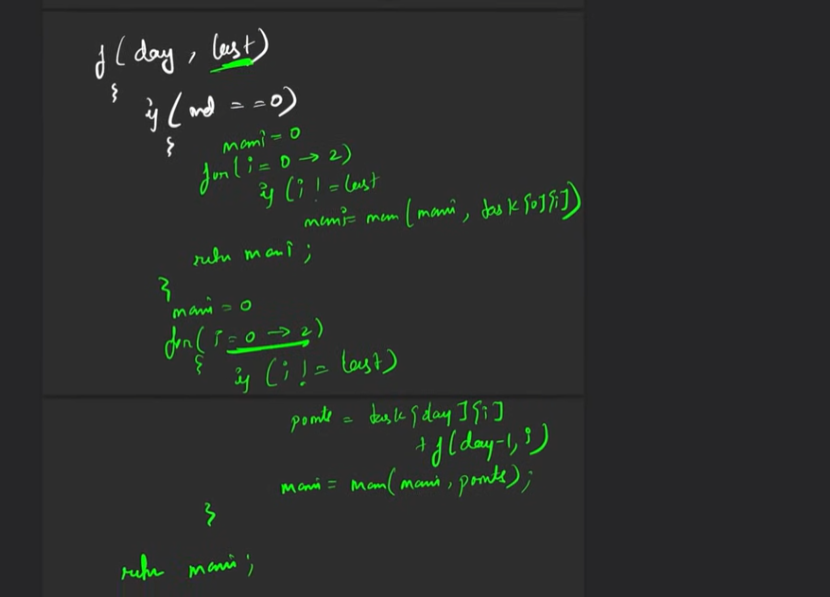

#### memoization

In [ ]:
from typing import List

def ninjaTraining(n: int, points: List[List[int]]) -> int:
    dp = [[-1 for _ in range(4)] for _ in range(n)]

    def recurse(day, last):
        if day == 0:
            maxi = 0
            for i in range(3):
                if i != last:
                    maxi = max(maxi, points[0][i])
            return maxi
        
        if dp[day][last] != -1:
            return dp[day][last]

        maxi = 0
        for i in range(3):
            if i != last:
                point = points[day][i] + recurse(day - 1, i)
                maxi = max(maxi, point)
        
        dp[day][last] = maxi
        return maxi

    return recurse(n - 1, 3)  


#### tabulation

In [ ]:
from typing import List

def ninjaTraining(n: int, points: List[List[int]]) -> int:
    dp = [[-1 for _ in range(4)] for _ in range(n)]
    dp[0][0] = max(points[0][1],points[0][2])
    dp[0][1] = max(points[0][0],points[0][2])
    dp[0][2] = max(points[0][0],points[0][1])
    dp[0][3] = max(points[0][1],points[0][2],points[0][0])


    for day in range(1,n):
        for last in range(4):
            dp[day][last] = 0
            for task in range(3):
                if task !=  last:
                    point = points[day][task] + dp[day-1][task]
                    dp[day][last] = max(dp[day][last],point)


    return dp[n-1][3]

# DP for Grids

### DP -08 Unique Paths leetcode 62

In [ ]:
class Solution:
    def uniquePaths(self, m: int, n: int) -> int:
        dp = [[-1 for _ in range(n)] for _ in range(m)]
        """
        # memoization
        def rec(i,j):
            if i == 0 and j==0:
                return 1
            elif i < 0 or j < 0:
                return 0
            
            if dp[i][j]!=-1:
                return dp[i][j]

            else:
                up = rec(i-1,j)
                left = rec(i,j-1)
            dp[i][j] = up+left
            return dp[i][j]        
        output = rec(m-1,n-1)
        return output
        """
        # tabulation
        # base case
        dp[0][0] = 1        
        for i in range(m):
            for j in range(n):
                up, left = 0,0
                if i==0 and j==0:
                    pass
                else:
                    if i>0:
                        up = dp[i-1][j]
                    if j>0:
                        left = dp[i][j-1]
                    dp[i][j] = up+left

        return dp[m-1][n-1]


### Path with obstacles Leetcode 63

In [ ]:
class Solution:
    def uniquePathsWithObstacles(self, obstacleGrid: List[List[int]]) -> int:
        m = len(obstacleGrid)
        n = len(obstacleGrid[0])
        dp = [[-1 for _ in range(n)] for _ in range(m)]
        # memoization
        if len(obstacleGrid) == 1 and len(obstacleGrid[0])==1 :
            if obstacleGrid[0][0] == 1:                    
                return 0
            return 1 
        def rec(i,j):
            if i == 0 and j==0:
                if obstacleGrid[0][0] == 1:
                    return 0
                return 1
            elif i < 0 or j < 0:
                return 0
            
            if dp[i][j]!=-1:
                return dp[i][j]

            if obstacleGrid[i][j] == 1:
                dp[i][j] = 0
                return 0

            else:
                up = rec(i-1,j)
                left = rec(i,j-1)
            dp[i][j] = up+left
            return dp[i][j]        
        output = rec(m-1,n-1)
        return output

### DP 10 Minimum Path Sum Leetcode 64

In [ ]:
class Solution:
    def minPathSum(self, grid: List[List[int]]) -> int:
        
        # memoization
        def rec(i,j):
            if i==0 and j==0:
                return grid[0][0]
            if i<0 or j<0:
                return float("inf")
            if dp[i][j] != -1:
                return dp[i][j] 
            up = grid[i][j] + rec(i-1,j)
            left = grid[i][j] + rec(i,j-1)
            dp[i][j]= min(up,left)
            return dp[i][j]
        m,n = len(grid),len(grid[0])
        dp = [[-1 for _ in range(n)] for _ in range(m)]
        output = rec(m-1,n-1)
        return output

        """
        # tabulation
        m,n = len(grid),len(grid[0])
        dp = [[-1 for _ in range(n)] for _ in range(m)]
        
        # base case
        dp[0][0] = grid[0][0]

        for i in range(m):
            for j in range(n):
                if i == 0 and j==0:
                    pass
                else:
                    up,left =float("inf"),float("inf")
                    if i > 0:
                        up = grid[i][j] + dp[i-1][j]
                    if j > 0:
                        left = grid[i][j] + dp[i][j-1]
                    dp[i][j] = min(up,left)
        return dp[m-1][n-1]

        """

## Traingle Matrix. Finding minimum  path to the last row -- 120
<pre>
Two approaches 
1. recursion from 0,0 // striver did this
base case is when you are in last row return value in traingle at that position
else move down, move daignoal return min value among them
comapritively easy
2. recursion from last row // i did this


In [ ]:
class Solution:
    def minimumTotal(self, triangle: List[List[int]]) -> int:
        """
        memoization
        def rec(i,j):
            if i==0 and j ==0:
                return triangle[0][0]
            if j<0 or i<j:
                return float("inf")
            if dp[i][j] != -1:
                return dp[i][j]
            up = triangle[i][j] + rec(i-1,j)
            cross = triangle[i][j] + rec(i-1,j-1)
            dp[i][j] =  min(up,cross)
            return dp[i][j]
        """
        # tabulation
        m = len(triangle)    
        dp = [[-1 for i in range(j+1)] for j in range(m)]
        # base case
        dp[0][0] = triangle[0][0]
        for i in range(1,m):
            for j in range(i+1):
                up,cross = float("inf"),float("inf")
                if j != i: # last element of row because when we go up difinitely there will be no that jth element in the previous row
                    up = triangle[i][j] + dp[i-1][j]
                if j > 0:
                    cross = triangle[i][j] + dp[i-1][j-1]
                dp[i][j] = min(up,cross)
        return min(dp[-1])

### 931. Minimum Falling Path Sum
used striver approach in above problem from recursion from 0th row to last
tabulation from last row to 0th row. min of 0th

In [ ]:
class Solution:
    def minFallingPathSum(self, matrix: List[List[int]]) -> int:
        """
        # memoisation is not working
        def rec(i,j):
            if j >= n or j<0:
                return float("inf")
            if i == n-1: # states in a last row
                return matrix[i][j]
            if dp[i][j] != -1:
                return dp[i][j]
            down =  matrix[i][j] + rec(i+1,j)
            rightdag =  matrix[i][j] + rec(i+1,j+1)
            leftdag =  matrix[i][j] + rec(i+1,j-1)
            dp[i][j] =  min(down,rightdag,leftdag)
            return dp[i][j]
    # square matrix
        n = len(matrix)
        dp = [[-1 for _ in range(n)] for _ in range(n)]
        mini = float("inf")
        for i in range(n):
            res = rec(0,i)
            mini = min(res,mini)
        return mini

        """
        # tabulation
        n = len(matrix)
        # dp = [[-1 for _ in range(n)] for _ in range(n)]
        
        # handling base case
        temp = matrix[-1].copy()
        curr = [-1]*n
        for i in range(n-2,-1,-1):
            for j in range(n):
                down,rightdag,leftdag = float("inf"),float("inf"),float("inf")
                down =  matrix[i][j] + temp[j]
                if j != n-1:
                    rightdag =  matrix[i][j] + temp[j+1]
                if j != 0:
                    leftdag =  matrix[i][j] + temp[j-1]
                curr[j] =  min(down,rightdag,leftdag)
            temp = curr.copy()

        return min(temp)



3
2
1
0


### 1463. Cherry Pickup II
<pre>
Different start and different ends
simultaneously moving two robots 
each robot(r1,r2) does 3 tasks so totaly 9 unique move. 3X3

r1 i+1,j-1
    r2 i+1,j-1
    r2 i+1,j
    r2 i+1,j+1
r1 i+1,j
    r2 i+1,j-1
    r2 i+1,j
    r2 i+1,j+1
r1 i+1,j+1
    r2 i+1,j-1
    r2 i+1,j
    r2 i+1,j+1
This simulated using loop [-1,0,1]
</pre>


In [ ]:
class Solution:
    def cherryPickup(self, grid: List[List[int]]) -> int:
        def rec(i,j1,j2):
            
            # boundry Case
            if j1<0 or j2<0 or j1>n-1 or j2>n-1:
                return -float("inf")

            # base case
            if i == m-1: # in a last row
                if j1 == j2:
                    return grid[i][j1] # if at same position only one will collect
                return grid[i][j1] + grid[i][j2] # both will collect

            if dp[i][j1][j2] != -1:
                return dp[i][j1][j2]
 
            # Nine combinations should be checken
            dj = [-1,0,1]
            maxi = -float("inf")
            for k in dj:
                for l in dj:
                    if j1 == j2:
                        maxi = max(maxi,grid[i][j1]+ rec(i+1,j1+k,j2+l))
                    else:
                        maxi = max(maxi,grid[i][j1]+grid[i][j2]+ rec(i+1,j1+k,j2+l))
            dp[i][j1][j2] = maxi                        
            return maxi
            
        m = len(grid)
        n = len(grid[0])
        dp = [[[-1 for _ in range(n)] for _ in range(n)] for _ in range(m)]
        output = rec(0,0,n-1) 
        return output

-inf

# DP on subsequences/subsets

### Array contain any sub sequence or subarray or subset with sum K. Return True or False 
### GFG -- Subset Sum Problem
<pre>
whats the intution??
Here what the recursion function does?
     fun(ind,target)
     it does check can we target sum from the sub arrays 0->ind

what will be the base case?
if target == 0 return True
if ind == 0  return a[0] == target  


In [ ]:
# can be solved using two pointer approach too
class Solution:
    def isSubsetSum (self, arr, sum):
        """
        # DP with memoization
        def rec(ind,target):
            if target == 0:
                return True
            if ind == 0:
                return arr[0] == target
            
            if dp[ind][target] != -1:
                return dp[ind][target]
            
            not_take = rec(ind-1,target)
            take = False
            if target >= arr[ind]: # we can't take the element if arr[ind] is greater than required target 
                take = rec(ind-1,target-arr[ind])
            
            dp[ind][target] =  take or not_take
            return dp[ind][target]
        
        dp = [[-1 for _ in range(sum+1)] for _ in range(len(arr))] #shape is max_ind X max_sum        
        return rec(len(arr)-1,sum)
        """ 
        dp = [[0 for _ in range(sum+1)] for _ in range(len(arr))]
        # base case 
        for i in range(len(arr)):
            dp[i][0] = 1  # dp[ind][target] = 1 if target == 0 means we got the required sum
        if arr[0] <= sum:
            dp[0][arr[0]] = 1 # if we have only one element then we can only get the sum if arr[0] == target
        #tabulation
        for ind in range(1,len(arr)):
            for target in range(1,sum+1):
                not_take = dp[ind-1][target]
                take = False
                if target >= arr[ind]:
                    take = dp[ind-1][target-arr[ind]]
                dp[ind][target] =  take or not_take
        
        return dp[len(arr)-1][sum]
        

###  Leetcode 416. Partition Equal Subset Sum
<pre>
Can we Partition into two sub arrays with equal sum. Above solution pass sum/2 to function if possible them by default other array also has sum/2 as sum.
if sum is even it odd return False

In [ ]:
class Solution(object):
    def canPartition(self, arr):
        sum=0
        for i in arr:
            sum +=i 
        if sum%2 == 1:
            return False
        else:
            sum = sum//2 
        dp = [[0 for _ in range(sum+1)] for _ in range(len(arr))]
        # base case 
        for i in range(len(arr)):
            dp[i][0] = 1  # dp[ind][target] = 1 if target == 0 means we got the required sum
        if arr[0] <= sum:
            dp[0][arr[0]] = 1 # if we have only one element then we can only get the sum if arr[0] == target
        #tabulation
        for ind in range(1,len(arr)):
            for target in range(1,sum+1):
                not_take = dp[ind-1][target]
                take = False
                if target >= arr[ind]:
                    take = dp[ind-1][target-arr[ind]]
                dp[ind][target] =  take or not_take
        
        return True if dp[len(arr)-1][sum] == 1 else False
        

### GFG -- Minimum sum partition
<pre>
What is the minimum difference possible if we divide the arr into two parts
Approach:
To underestand the approach first need to understand the tabulation table.
In that that table 
1. row represents the index value (0 -> len(arr)-1)     --> ind
2. column indicate the target value (0 -> givenTarget)  -->  target
means each value says upto this `ind` value can this `target` can be achived. 
so in the table last row (mean upto last index -> complete array)
- can we get sum 1 -->  dp(len(arr)-1,1) --> True if possible //similaryly we get all true or false
suppose we can get true for these ind('target') values :-  1, 5, 6, 7, 9 // for this problem we consider total sum i.e. 9 will be sum of arr 
if subtract total sum from them we get other subset sum :- 8, 4, 3, 2, 0
if calculate the difference between these sub arrays sums :- 7, 1, 3, 5, 9 --> minimum is 1.

In [ ]:
class Solution:
	def minDifference(self, arr):
		# code here
        sum = 0
        for i in arr:
            sum+=i
        dp = [[0 for _ in range(sum+1)] for _ in range(len(arr))]
        for i in range(len(arr)):
            dp[i][0] = 1
        dp[0][arr[0]] = 1
        for ind in range(len(arr)):
            for target in range(1, sum+1):
                not_take = dp[ind-1][target]
                take = False
                if target >= arr[ind]:
                    take = dp[ind-1][target-arr[ind]]
                dp[ind][target] = take or not_take
        
        mini = float("inf")
        for ind,val in enumerate(dp[-1][1:]):
            if val == 1:
                sum1 = ind+1
                sum2 = sum-sum1
                diff = abs(sum2-sum1)
                mini = min(diff,mini)
        return mini

### Perfect Sum Problem from GFG
<pre>
calculate the number of subsets can be formed with sum equals the target
Strives Code was only for non Zero values but this work zero values

In [ ]:
class Solution:
    def perfectSum(self, arr, target):
        MOD = 10**9 + 7
        n = len(arr)
        
        # Initialize memoization table
        dp = [[0 for _ in range(target + 1)] for _ in range(n)]

        """
        # memoization
        
        def rec(ind, target):
            # Base case
            if ind == 0:
                if target == 0 and arr[0] == 0:
                    return 2  # {} and {0}
                if target == 0 or arr[0] == target:
                    return 1
                return 0

            if dp[ind][target] != -1:
                return dp[ind][target]

            # Not pick the element
            not_pick = rec(ind - 1, target)
            
            # Pick the element if it's not bigger than target
            pick = 0
            if arr[ind] <= target:
                pick = rec(ind - 1, target - arr[ind])

            dp[ind][target] = (pick + not_pick) % MOD
            return dp[ind][target]

        return rec(n - 1, target)
        
        """
        # tabulation
        
        # base case 1 all targets == 0 are 1
        
        for i in range(len(arr)):
            dp[i][0] = 1
        
        # base case 2 
        
        if arr[0] <= target:
            dp[0][arr[0]] += 1 
        
        # base case 3
        
        if arr[0] == 0:
            dp[0][0] = 2
            
        for i in range(1, n):
            for t in range(target + 1):
                not_pick = dp[i-1][t]
                pick = 0
                if arr[i] <= t:
                    pick = dp[i-1][t - arr[i]]
                dp[i][t] = (pick + not_pick) % MOD

        return dp[n-1][target]        
        

### Partitions with Given Difference
Given an array arr[], partition it into two subsets(possibly empty) such that each element must belong to only one subset. Let the sum of the elements of these two subsets be sum1 and sum2. Given a difference d, count the number of partitions in which sum1 is greater than or equal to sum2 and the difference between sum1 and sum2 is equal to d. 
<pre>

Then what is the approach? 
In above problem we saw to count the number of subsets with given target.

here our target is to find find the how many partions with given difference d

subset1 s1 , subset2 s2
s1-s2 = d   //  can s1 = total-s2
total - s2 - s2 = d
(total - d)/2 = s2

so how many subsets with s2 (i.e. (total - d)/2 ) values that many partition can be done

# what is the edge case then
if (total - d) is negative or (total - d) is odd return 0

as constraint said arr[i] >= 0. if it is negative then how can be some subset value can be negative or if (total - d) is odd then /2 will give 
decimal number how can s2 sum be decimal so both are base or edge cases


In [ ]:

from typing import List


class Solution:
    def countPartitions(self, arr, d):
        # code here
        
        MOD = 10**9 + 7
        n = len(arr)
        
        # Initialize memoization table

        
        # memoization
        
        def rec(ind, target):
            # Base case
            if ind == 0:
                if target == 0 and arr[0] == 0:
                    return 2  # {} and {0}
                if target == 0 or arr[0] == target:
                    return 1
                return 0

            if dp[ind][target] != -1:
                return dp[ind][target]

            # Not pick the element
            not_pick = rec(ind - 1, target)
            
            # Pick the element if it's not bigger than target
            pick = 0
            if arr[ind] <= target:
                pick = rec(ind - 1, target - arr[ind])

            dp[ind][target] = (pick + not_pick) % MOD
            return dp[ind][target]
        
        t_sum = 0
        for i in arr : 
            t_sum+=i
        
        if t_sum-d < 0 or (t_sum-d)%2:
            return 0
        
        dp = [[-1 for _ in range((t_sum-d)//2 + 1)] for _ in range(n)]
        
        return rec(n - 1, (t_sum-d)//2)

hello


### [0-1 Knapsack] from gfg
(https://www.geeksforgeeks.org/problems/0-1-knapsack-problem0945/1)

In [ ]:
class Solution:
    def knapsack(self, W, val, wt):
        # code here 
        """
        def rec(ind,b_wt):
            if ind == 0:
                if b_wt >= wt[ind]:
                    return val[ind]
                return 0
            if dp[ind][b_wt] != -1:
                return dp[ind][b_wt]
            not_pick = 0 + rec(ind-1,b_wt)
            pick = -float("inf")
            if wt[ind] <= b_wt:
                pick = val[ind] + rec(ind-1,b_wt-wt[ind])
            dp[ind][b_wt] = max(pick,not_pick)
            return dp[ind][b_wt]
        
        dp = [[-1 for _ in range(W+1)] for _ in range(len(wt))]
        
        return rec(len(wt)-1, W)
        
        # tabulation
        dp = [[0 for _ in range(W+1)] for _ in range(len(wt))]
        for i in range(wt[0],W+1):
            dp[0][i] = val[0]
        for ind in range(1,len(wt)):
            for b_wt in range(0,W+1):
                not_pick = 0 + dp[ind-1][b_wt]
                pick = -float("inf")
                if wt[ind] <= b_wt:
                    pick = val[ind] + dp[ind-1][b_wt-wt[ind]]
                dp[ind][b_wt] = max(pick,not_pick)
                
        return dp[len(wt)-1][W]
        
        """
        # space Optimization
        # level 01
        prev = [0 for _ in range(W+1)]
        curr = [0 for _ in range(W+1)]
        for i in range(wt[0],W+1):
            prev[i] = val[0]
        for ind in range(1,len(wt)):
            for b_wt in range(0,W+1):
                not_pick = 0 + prev[b_wt]
                pick = -float("inf")
                if wt[ind] <= b_wt:
                    pick = val[ind] + prev[b_wt-wt[ind]]
                curr[b_wt] = max(pick,not_pick)
            prev = curr.copy()
        if len(val)==1:
            return prev[-1]
        return curr[W]

### Coin Change Leetcode 322


In [ ]:
class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        """
        # memoisation

        def rec(ind, T):
            if ind == 0:
                if T % coins[ind] == 0:
                    return T//coins[ind]
                else:
                    return float("inf")
            if dp[ind][T] != -1:
                return dp[ind][T]
            not_take = 0 + rec(ind-1,T)
            take = float("inf")
            if coins[ind] <= T:
                # always for problems of repeated selection we will not change the index for take
                take = 1 + rec(ind,T-coins[ind])
            dp[ind][T] = min(take,not_take)
            return dp[ind][T]
        if amount == 0:
            return 0
        dp = [[-1 for _ in range(amount+1)] for _ in range(len(coins))]
        output =  rec(len(coins)-1, amount)
        if output == float("inf"):
            return -1
        return output

        
        # tabulation
        dp = [[0 for _ in range(amount+1)] for _ in range(len(coins))]
        # dp[0][0] = 0
        for T in range(0,amount+1):
            if T % coins[0] == 0:
                dp[0][T] = T//coins[0]
            else:
                dp[0][T] = float("inf")
        for ind in range(1,len(coins)):
            for T in range(amount+1):
                not_take = 0 + dp[ind-1][T]
                take = float("inf")
                if coins[ind] <= T:
                # always for problems of repeated selection we will not change the index for take
                    take = 1 + dp[ind][T-coins[ind]]
                dp[ind][T] = min(take,not_take)
        
        output =  dp[len(coins)-1][amount]
        if output == float("inf"):
            return -1
        return output

        """
        if amount == 0:
            return 0
        # if len(coins) == 1 :
        #     if amount % coins[0] == 0:
        #         return amount//coins[0]
        #     else:
        #         return -1
        # space optimization
        prev = [0 for _ in range(amount+1)] 
        curr = [float("inf") for _ in range(amount+1)]
        for T in range(0,amount+1):
            if T % coins[0] == 0:
                prev[T] = T//coins[0]
            else:
                prev[T] = float("inf")
        for ind in range(1,len(coins)):
            for T in range(amount+1):
                not_take = 0 + prev[T]
                take = float("inf")
                if coins[ind] <= T:
                # always for problems of repeated selection we will not change the index for take
                    take = 1 + curr[T-coins[ind]]
                curr[T] = min(take,not_take)
            prev = curr.copy()
        
        output =   prev[amount]
        if output == float("inf") or output == 0:
            return -1
        return output        

0